## Etivity 2 - Data preparation & Can we learn?
### Student ID: 18195067
### Student Name: Abhijit Sinha

In [1]:
# Importing Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import math
#from sklearn.preprocessing import Imputer
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import learning_curve

In [2]:
# Importing Dataset and using the first column as the index
df = pd.read_csv("./bank_et2.csv")

# Remove the redundant column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [5]:
# Check the summary of categorical attributes
df.describe(include=np.object)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,yes
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


## Task 1 (CS5062)
Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [6]:
# Check for null values
df.isnull().sum() #.sort_values(ascending=False)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

#### There is missing data in the following features:
    - age      : 12 missing
    - job      : 10 missing
    - education: 104 missing
    - contact  : 191 missing
    - poutcome : 454 missing

### Handling missing values for AGE

In [7]:
df['age'].describe()

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [8]:
# Lets analyse the data samples with missing age values
df[df['age'].isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


- We can see that the customers who's age is missing are either `married or single` and none of the divorced customers age is missing.

##### Attribute "age" can be related to the attributes "job" and "marital" status. 

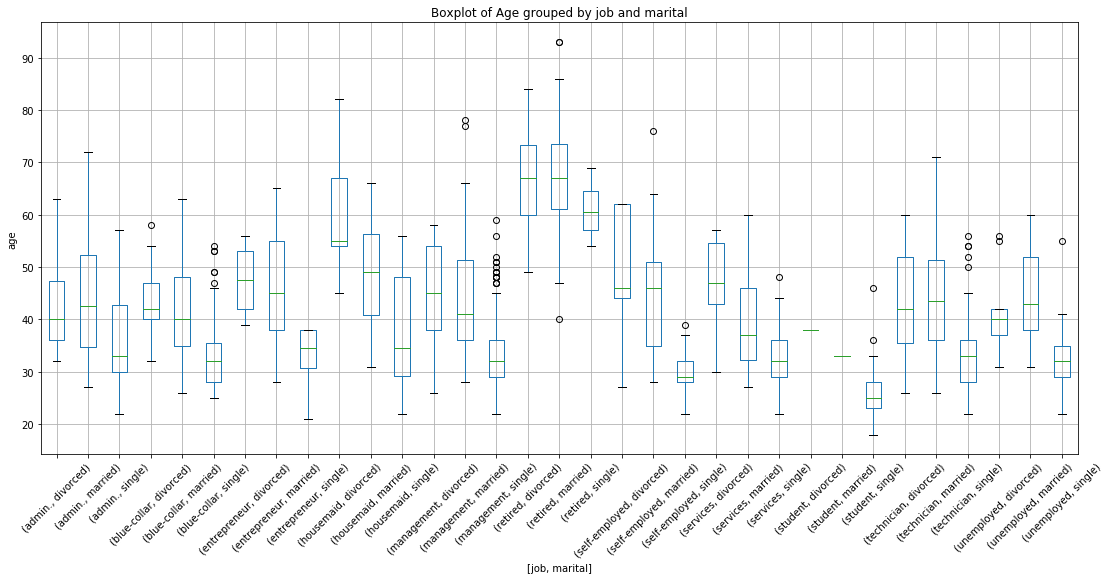

In [9]:
df.boxplot(column='age', by=['job', 'marital'], rot=45, figsize=(18,8))

plt.title("Boxplot of Age grouped by job and marital")
plt.ylabel("age")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.show()

We can see some variation in the median of `age` for each group and these medians can be used for imputing the missing values in each group after ensuring there is no missing values for `job` and `marital` attributes.

We know that there is **no missing values for marital status** but **attribute "job" has some missing values** which needs to be handled

### Handling missing value for attribute JOB

In [10]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [11]:
# Lets analyse the dataframe with missing JOB values
df[df['job'].isnull()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,42.0,NaN,single,primary,no,2398,-1.418888,1.809977,yes,no,cellular,3,feb,144,2,271,2,failure,no
257,46.0,NaN,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
831,41.0,NaN,single,primary,no,2398,-0.243804,-0.685437,yes,no,NaN,8,may,287,2,-1,0,NaN,no
1223,55.0,NaN,married,secondary,no,2206,-1.134511,0.861389,no,no,cellular,12,aug,265,1,91,5,success,yes
1281,50.0,NaN,married,NaN,no,558,-0.455001,1.595412,no,no,cellular,9,jul,464,1,683,6,failure,yes
1669,54.0,NaN,married,secondary,no,2206,-0.575645,-0.242814,no,no,cellular,13,may,260,1,91,4,success,yes
1711,77.0,NaN,married,NaN,no,397,-0.871514,0.134782,no,no,telephone,7,may,300,3,-1,0,NaN,yes
1801,28.0,NaN,single,NaN,no,326,0.298961,1.653248,no,no,cellular,11,oct,450,1,231,1,success,yes
1868,48.0,NaN,single,NaN,no,1819,0.680564,-0.786048,no,no,cellular,2,sep,1440,1,458,1,failure,yes
1975,45.0,NaN,married,tertiary,no,406,-2.211965,2.109631,no,no,cellular,7,sep,314,1,-1,0,NaN,yes


In [12]:
# Only 10 missing values in Job can drop it.
df.dropna(subset=['job'], inplace=True)

# Reset the index of rows
df.reset_index(drop=True, inplace=True)

In [13]:
# create a pivot table, which contains the median values for all the marital and job groups.
table_age = df.pivot_table(values='age', 
                       index='marital', 
                       columns='job', 
                       aggfunc=np.median)
print(table_age)

job       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
marital                                                                       
divorced    40.0         42.0          47.5       55.0        45.0     67.0   
married     42.5         40.0          45.0       49.0        41.0     67.0   
single      33.0         32.0          34.5       34.5        32.0     60.5   

job       self-employed  services  student  technician  unemployed  
marital                                                             
divorced           46.0      47.0     38.0        42.0        40.0  
married            46.0      37.0     33.0        43.5        43.0  
single             29.0      32.0     25.0        33.0        32.0  


In [14]:
# Define function to return an element of the pivot table
def func_age(x):
    return table_age.loc[x['marital'], x['job']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(func_age, axis=1), inplace=True)

In [15]:
# Verify if null values in age are gone
df['age'].isnull().sum()

0

### Handling missing values for Education

In [16]:
# Find missing values for attribute Education
df['education'].isnull().sum()

99

After removing the missing job samples we are left with 99 missing education fields from the previous 104, as there was some overlap in the missing values between the 2 attributes

In [17]:
# Education properties
df['education'].value_counts(normalize=True)
df.education.shape[0]

1990

In [18]:
# Job vs Education
pd.crosstab(df.job, df.education, margins=True).style.background_gradient(cmap='autumn_r')

education,primary,secondary,tertiary,All
job,,,,
admin.,10,194,35,239
blue-collar,93,185,10,288
entrepreneur,4,18,22,44
housemaid,16,12,7,35
management,9,38,391,438
retired,53,77,22,152
self-employed,0,15,47,62
services,12,135,11,158
student,4,59,16,79


We can see from the above table that job has a significant impact on the education field. Most of the admin people have secondary education and management people have tertiary education and so on.

I will use the max id for education per job and fill the missing values.

In [19]:
# Find the missing education w.r.t job field
# Return index of first occurrence of maximum over requested axis

education_by_job = pd.crosstab(df['education'], df['job']).idxmax(axis=0)

print(education_by_job)

job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
dtype: object


In [20]:
def func_education(x):
    return education_by_job.loc[x['job']]

# Replace missing values of education with max chances of job-with-education
df['education'].fillna(df[df['education'].isnull()].apply(func_education, axis=1), inplace=True)

In [21]:
# Verify if null values in education are gone
df['education'].isnull().sum()

0

### Handling missing values for Contact

In [22]:
# Find missing values for attribute contact
df['contact'].isnull().sum()

190

In [23]:
# contact category values
df['contact'].value_counts(normalize=True)

cellular     0.919444
telephone    0.080556
Name: contact, dtype: float64

Since 92% of the values are “cellular”, it is safe to impute the missing values as “cellular” as there is a high probability of guessing correctly. We might be adding bias to the dataset with this approach though!

In [24]:
# Fill missing Contact values with "cellular"
df['contact'].fillna('cellular', inplace=True)

### Handling missing values for poutcome 

In [25]:
# Find missing values for attribute poutcome
df['poutcome'].isnull().sum()

451

Create a whole new category for the missing data in poutcome. This can yield some new insights and could potentially be useful when building our model 

In [26]:
# Impute missing values as new catrgory "unknown"
df.loc[df['poutcome'].isnull(), 'poutcome'] = "unknown"

df.poutcome.unique()

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [27]:
# Check for null values
print(df.isnull().sum())
print(df.shape)

age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64
(1990, 19)


All the missing values has been handled and we have a bank dataframe with 1990 rows and 19 columns

## Task 2 (CS5062)

An outlier is an unlikely observation in a dataset and may have one of many causes.
- The interquartile range can be used to identify outliers in data regardless of the distribution
- The standard deviation can be used to identify outliers in Gaussian or Gaussian-like data

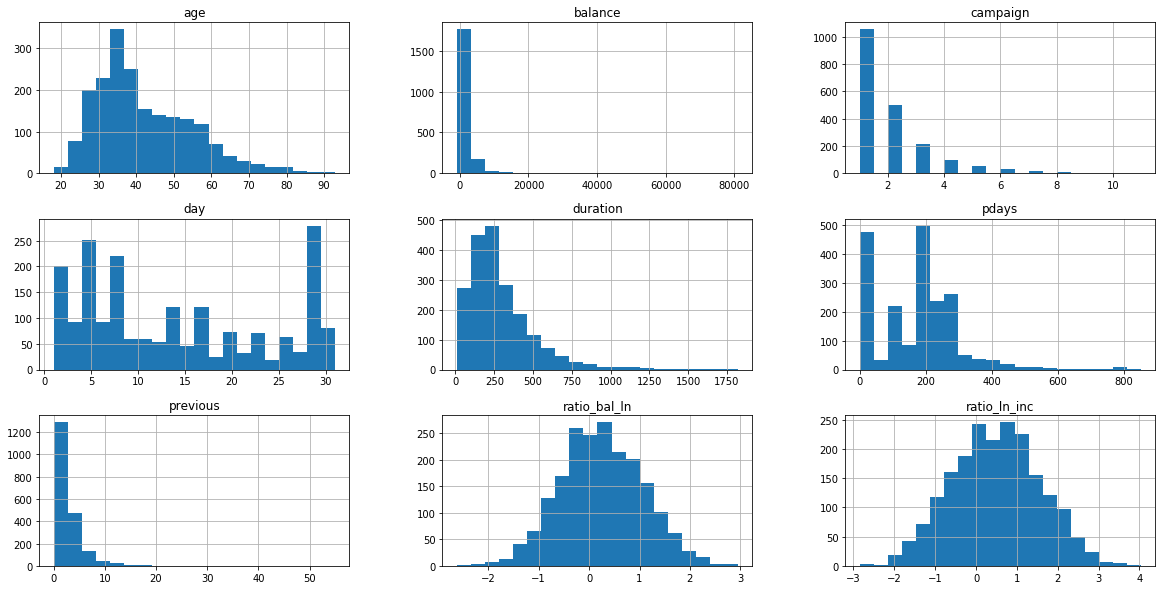

In [28]:
# Distribution of numerical features for the bank data
df.hist(figsize=(20,10), bins=20)
plt.show()

Quick observation from Histogram plot show the following:
- Target candidates for outlier detection and log transformation are: `balance`, `age`, `duration`, `pdays` 
- Campaign, day and previous are having discrete values
- ratio_bal_ln and ratio_ln_inc are uniformly distributed

### Outliers in Balance

In [29]:
df.balance.describe()

count     1990.000000
mean      1414.038191
std       3138.455806
min       -980.000000
25%        199.000000
50%        549.000000
75%       1634.750000
max      81204.000000
Name: balance, dtype: float64

Mean for attribute `balance` is 1414 and median is 551, that shows the data is very skewed and presence of some extreme values

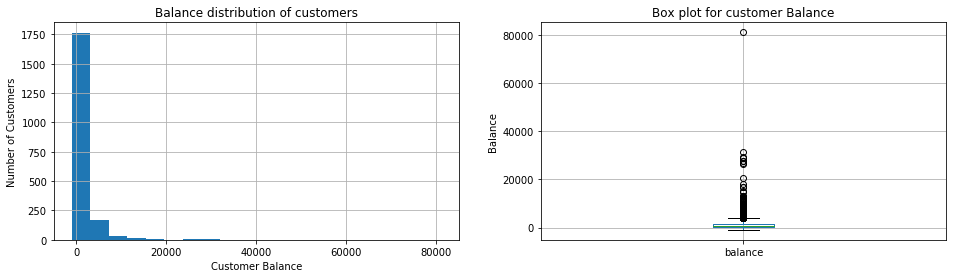

In [30]:
# Create figure with two subplots for BALANCE attribute
fig = plt.figure(figsize=(16,4))

# Plot Balance distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Balance distribution of customers")
ax1.set_xlabel('Customer Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Next, we look at boxplots to examine for outliers
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylabel('Balance')
ax2.set_title("Box plot for customer Balance")
df.boxplot(column='balance')

plt.show()

Histogram on the attribute `balance` shows that the **data is heavily skewed** and does have a normal distribution.
The above box plot shows there are some extreme values with **one customer has a balance of above 80,000**. 

However, since these are bank data I am not sure if it really an outlier. The values seems to be in the valid range from bank data so we would like to keep accurate data. Lets apply [Tukeys IQR)] to get more insight on the outliers.

### Tukey IQR method
Tukey  IQR (interquartile range) method is a robust method for labeling outliers is outlier detection developed by John Tukey. IQR range is the range between the first and the third quartiles (the edges of the box). Tukey considered any data point that fell outside of either 1.5 times the IQR below the first – or 1.5 times the IQR above the third – quartile to be “outside” or “far out”.

In [31]:
def find_outliers_tukey(x):
    # Define a fucntion to find outlier using Tuckey's IQR range
    
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [32]:
# Lets find the outliers for Balance using Tuckey's IQR range

tukey_bal_indx, tukey_values = find_outliers_tukey(df['balance'])
print("Balance has {} outliers".format(len(tukey_values)))
print("Balance has outlier of values:", np.sort(tukey_values))

Balance has 159 outliers
Balance has outlier of values: [ 3797  3810  3840  3848  3904  3904  3948  4012  4012  4017  4017  4041
  4071  4112  4124  4126  4168  4176  4189  4243  4243  4256  4256  4279
  4328  4328  4343  4348  4389  4389  4401  4471  4497  4519  4539  4586
  4608  4613  4613  4629  4657  4680  4683  4708  4708  4721  4745  4761
  4787  4831  4833  4867  4873  4945  4951  4961  4984  5000  5021  5037
  5047  5108  5112  5151  5169  5236  5275  5329  5397  5397  5418  5452
  5475  5475  5511  5699  5715  5715  5731  5741  5838  5956  5958  5958
  6027  6036  6046  6101  6138  6181  6203  6322  6384  6403  6411  6495
  6507  6651  6695  6771  6809  7005  7050  7249  7317  7529  7546  7608
  7780  7802  7929  7968  8000  8038  8103  8165  8266  8304  8304  8304
  8304  8332  8626  8876  8876  9001  9299  9367 10583 10600 10861 10861
 11115 11303 11650 11766 11862 12067 12067 12264 12264 12356 12569 12939
 13107 14968 15341 16957 16992 17946 20727 26306 26965 27696 27696 2

Tukey's method was a bit harsh on the outliers as we can see the values from 3797 to 81204 all are considered as outliers. These might be important data so we can't just go ahead and remove them.

However, the value 81204 is definitely seems to be an obvious outlier and we should remove it.

In [33]:
# Remove the extreme maximum value from balance

bal_max = df.balance.max()
df = df[df['balance'] < bal_max]

# Reset the index of rows
df.reset_index(drop=True, inplace=True)

In [34]:
df.balance.describe()

count     1989.000000
mean      1373.922574
std       2578.917573
min       -980.000000
25%        199.000000
50%        549.000000
75%       1631.000000
max      31472.000000
Name: balance, dtype: float64

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
# Since negative values are present the Yeo-Johnson transformed is to be preferred.
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

# data=df.balance
# print(pt.fit(data))

# print(pt.lambdas_)

# print(pt.transform(data))


#### Applying Log transformation to balance
The log transformation, a widely used method to address skewed data which solves the problem of non-normal distribution of data. We will be using the log transformation to make data conform to normality. The log transformation can be useful here as we have a large number of outliers.

In [36]:
# Minimum values of balance is negative, so we need to shift it as log transformation only works on +ve data
df.balance.min()

-980

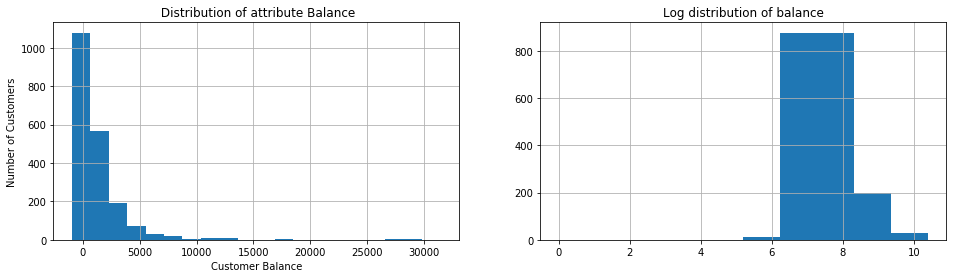

In [37]:
# Create figure with two subplots for BALANCE attribute
fig = plt.figure(figsize=(16,4))

# Plot BALANCE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title(" Distribution of attribute Balance")
ax1.set_xlabel('Customer Balance')
ax1.set_ylabel('Number of Customers')
df['balance'].hist(bins=20)

# Distrubtion of balance after appyling Log transform
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Log distribution of balance")

# Shift the value to 0 before applying log transformation as it can’t be applied to zero or negative values.
df['balance_log'] = df['balance'] + abs(df.balance.min()) + 1
df['balance_log'] = np.log(df['balance_log'])
df['balance_log'].hist()
plt.show()

In [38]:
# drop balance as we have log of balance
df.drop('balance', axis=1, inplace=True)

The histograms show that both new feature `balance_log` have distribution closer to normal than the original feature `balance`

#### Outlier analysis for AGE

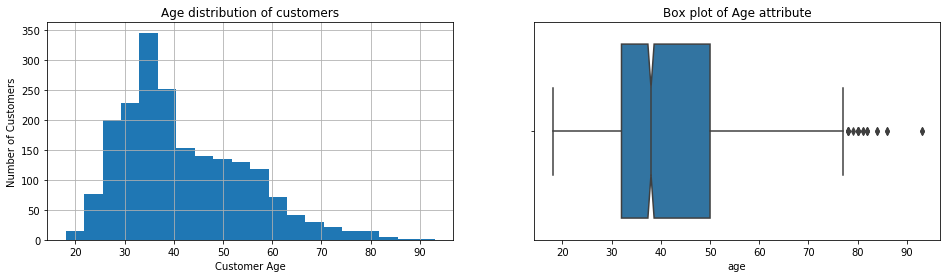

In [39]:
# Create figure with two subplots for AGE attribute
fig = plt.figure(figsize=(16,4))

# Plot AGE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Age distribution of customers")
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Number of Customers')
df['age'].hist(bins=20)

# Next, we look at boxplots to examine for outliers
ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(x='age', data=df, notch=True)
ax2.set_title("Box plot of Age attribute")

plt.show()

Histogram on the attribute `age` shows that the data is skewed and does have a normal distribution.
The above box plot shows the possibility of some extreme values as some customers have age in range 77-95 years. 

##### Analyze age in detail using Tukey's Interquartile Range Method for outlier detection

In [40]:
# Lets find the outliers for Age using Tuckey's IQR method

tukey_indices, tukey_values = find_outliers_tukey(df['age'])
print("Age has {} outliers".format(len(tukey_values)))
print("Age has outlier of values:", np.sort(tukey_values))

Age has 23 outliers
Age has outlier of values: [78. 78. 78. 78. 78. 79. 80. 80. 80. 80. 80. 80. 81. 81. 82. 82. 82. 84.
 84. 86. 86. 93. 93.]


### Analyze the age outlier using 3 Standard Deviations method.
Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. We can see from the histogram that `age` has a uniform distribution so we can apply this method.

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples. 3 Standard Deviations from the Mean has 99.7% of the data.

Reference: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [41]:
def three_standard_dev(data):
    # Function to find outlier using the three standard deviation to mean
    
    # calculate age summary statistics
    age_mean, age_std = np.mean(data), np.std(data)

    # identify outliers
    cut_off = age_std * 3
    lower, upper = age_mean - cut_off, age_mean + cut_off

    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    
    return outliers

In [42]:
# find outlier in AGE using the three standard deviation to mean
age_outliers = three_standard_dev(df.age)

print("Identified outliers:", len(age_outliers))
print("Identified outlier values:", age_outliers)

Identified outliers: 17
Identified outlier values: [86.0, 93.0, 82.0, 80.0, 86.0, 93.0, 82.0, 80.0, 82.0, 80.0, 80.0, 80.0, 84.0, 84.0, 81.0, 80.0, 81.0]


The age values detected as outliers by both Tukey and 3 Standard deviation methods, seems to be in the valid range for `age` as a person can have such age numbers. So we would like to do keep the values and do log transformation on it.

#### Applying Log transformation to age

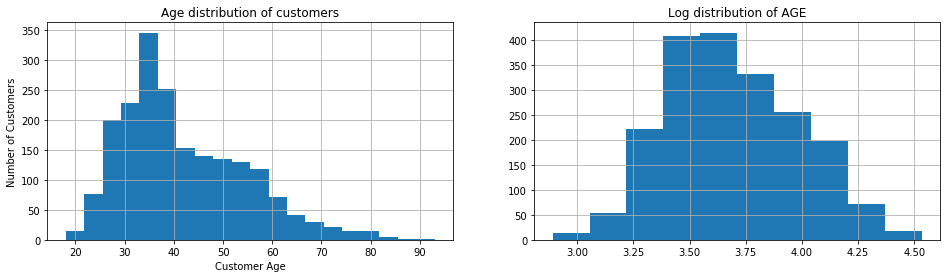

In [43]:
# Create figure with two subplots for AGE attribute
fig = plt.figure(figsize=(16,4))

# Plot AGE distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Age distribution of customers")
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Number of Customers')
df['age'].hist(bins=20)

# Use a log transformation to decrease the impact of extreme values in column AGE
ax2 = fig.add_subplot(1, 2, 2)
df['age_log'] = np.log(df['age'])
df['age_log'].hist()
ax2.set_title("Log distribution of AGE")
plt.show()

### Outlier detection in duration

In [44]:
df.duration.describe()

count    1989.000000
mean      291.252891
std       220.550229
min         7.000000
25%       146.000000
50%       236.000000
75%       375.000000
max      1823.000000
Name: duration, dtype: float64

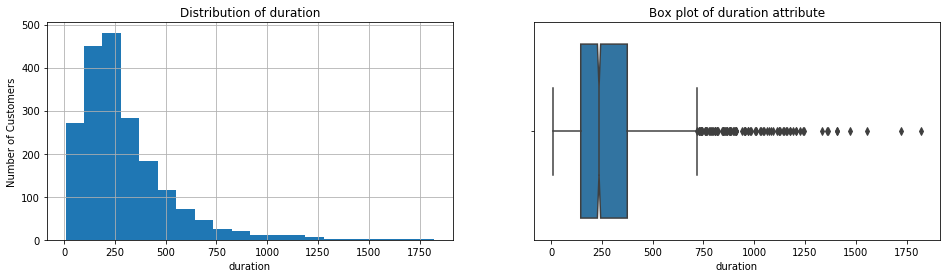

In [45]:
# Create figure with two subplots for duration attribute
fig = plt.figure(figsize=(16,4))

# Plot duration distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Distribution of duration")
ax1.set_xlabel('duration')
ax1.set_ylabel('Number of Customers')
df['duration'].hist(bins=20)

# Next, we look at boxplots to examine for outliers
ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(x='duration', data=df, notch=True)
ax2.set_title("Box plot of duration attribute")

plt.show()

In [46]:
# Outlier detection on raw data of duration:

# find outlier in AGE using the three standard deviation to mean
duration_outliers = three_standard_dev(df.duration)

print("Identified outliers BEFORE Log tranformation:", len(duration_outliers))
print("Identified outlier values:", duration_outliers)

Identified outliers BEFORE Log tranformation: 43
Identified outlier values: [957, 1074, 1156, 1823, 1160, 1047, 1121, 1026, 1007, 982, 1472, 1093, 1143, 1241, 1064, 1363, 1226, 1120, 968, 1148, 1193, 957, 1005, 967, 1008, 1360, 1207, 1720, 1407, 1205, 1114, 1178, 1127, 1556, 977, 1176, 1032, 1246, 1405, 1042, 1081, 953, 1334]


#### Applying Log transformation to duration to make the distribution uniform/Gaussian

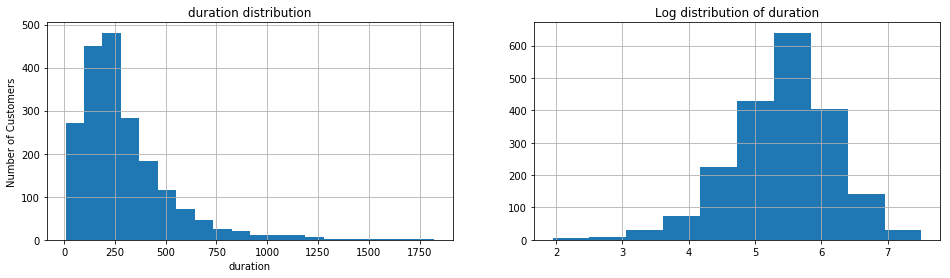

In [47]:
# Create figure with two subplots for duration attribute
fig = plt.figure(figsize=(16,4))

# Plot duration distribution
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("duration distribution")
ax1.set_xlabel('duration')
ax1.set_ylabel('Number of Customers')
df['duration'].hist(bins=20)

# Use a log transformation to decrease the impact of extreme values in column AGE
ax2 = fig.add_subplot(1, 2, 2)
df['duration_log'] = np.log(df['duration'])
df['duration_log'].hist()
ax2.set_title("Log distribution of duration")
plt.show()

In [48]:
# Outlier detection after LOG transformation of duration:

# find outlier in AGE using the three standard deviation to mean
duration1_outliers = three_standard_dev(df.duration_log)

print("Identified outliers AFTER Log tranformation:", len(duration1_outliers))
print("Identified outlier values:", duration1_outliers)

Identified outliers AFTER Log tranformation: 17
Identified outlier values: [2.833213344056216, 2.0794415416798357, 2.1972245773362196, 2.772588722239781, 1.9459101490553132, 2.772588722239781, 2.0794415416798357, 2.3978952727983707, 2.70805020110221, 2.4849066497880004, 1.9459101490553132, 2.5649493574615367, 2.995732273553991, 2.6390573296152584, 2.995732273553991, 3.044522437723423, 3.044522437723423]


#### Observation on duration:
The outliers detected before and after applying the log transformation for attribute `duration` has a big difference. 

This is probably because the distribution is more Gaussian after applying the Log transformation and hence the outliers are less

I am deciding not to remove the outliers here

### TODO: look for other outliers in numeric data and apply other techniques

## Task 3 (CS5062)
Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

Feature / Variable creation is a process to generate a new variables / features based on existing variable(s). We need to do a mixture of aggregating or combining features to create new features, and decomposing or splitting features to create new features. Two goals of feature generation can be dimensionality reduction and accuracy improvement.

Need to normalize or standardize the features as a final step

### Correlation  matrix to find any correlation between numerical features

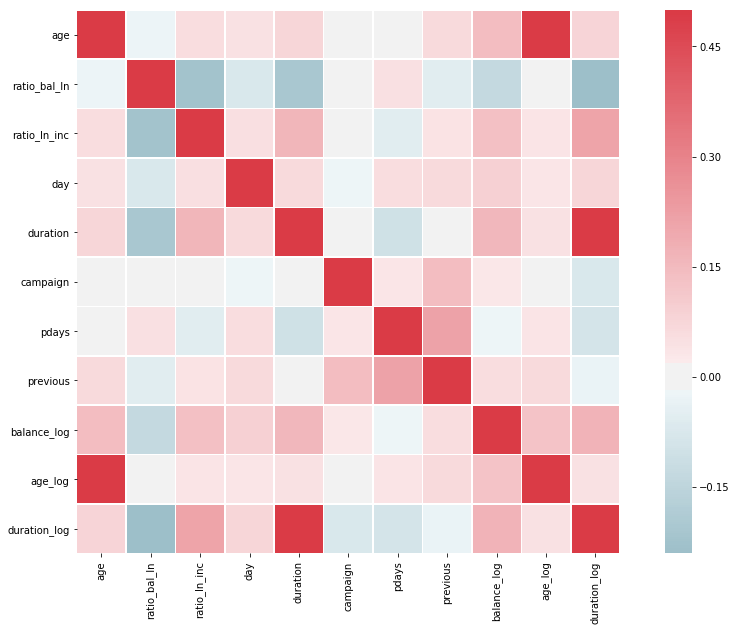

In [49]:
f, ax = plt.subplots(figsize=(16, 10))

# Compute the correlation matrix
#(https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
corr = df.corr()

# Generate a mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0, square=True, linewidths=.5)
plt.show()

Nothing obvious from the correlation map, except pdays and previous shows some level of correlation

PCA should help in figuring out if there is any strong correlation between features 

In [50]:
df.head()

,age,job,marital,education,default,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,subscribed,balance_log,age_log,duration_log
0,32.0,technician,single,tertiary,no,1.300134,0.473895,yes,no,cellular,...,apr,957,2,131,2,failure,no,7.224753,3.465736,6.863803
1,39.0,technician,divorced,secondary,no,-0.193701,0.237021,yes,yes,cellular,...,apr,233,2,133,1,failure,no,7.419980,3.663562,5.451038
2,59.0,retired,married,secondary,no,1.334266,0.121981,yes,yes,cellular,...,apr,126,2,239,1,failure,no,7.608871,4.077537,4.836282
3,47.0,blue-collar,married,secondary,no,0.362286,1.251328,yes,yes,cellular,...,apr,274,1,238,2,failure,no,7.229114,3.850148,5.613128
4,54.0,retired,married,secondary,no,0.072075,-0.533738,yes,no,cellular,...,apr,479,1,307,1,failure,no,7.593374,3.988984,6.171701


Feature creation:
- Binning the age
- Group age_binned with marital status [getting life stage of age group]
- Grouping various job categories
- Merge housing and loan as "has_loan"

In [51]:
# Creating the age group name
age_group_names = ['young', 'lower middle', 'middle', 'senior']

# Break the age groups into 4 parts and assign group names
df['age_binned'] = pd.qcut(df['age'], 4, labels = age_group_names)
df['age_binned'].value_counts()

young           518
middle          501
lower middle    489
senior          481
Name: age_binned, dtype: int64

### New feature "life_stage": based on age_bin and marital status

In [52]:
# Getting life stage of age group
df['life_stage'] = df.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
df['life_stage'].value_counts()

young & single             382
senior & married           369
middle & married           332
lower middle & married     278
lower middle & single      169
young & married            125
middle & single             95
senior & divorced           88
middle & divorced           74
lower middle & divorced     42
senior & single             24
young & divorced            11
Name: life_stage, dtype: int64

In [53]:
# Drop age and marital status as we will be using the new feature "life stage"
df.drop(['age', 'age_log', 'age_binned', 'marital'], axis=1,inplace = True)

#### Grouping job categories of relevant fields

In [54]:
# Combine similar jobs into categiroes

# A white-collar worker is a person who performs professional, managerial, or administrative work. 
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')

# Pink collar include jobs in the beauty industry, nursing, teaching, secretarial work, waitressing, or child care.
df['job'] = df['job'].replace(['services','housemaid'], 'pink-collar')

df['job'] = df['job'].replace(['student', 'unemployed', 'unknown'], 'other')

In [55]:
# New Job value counts
df.job.value_counts()

white-collar     708
technician       348
blue-collar      298
pink-collar      200
other            165
retired          161
self-employed     64
entrepreneur      45
Name: job, dtype: int64

### New feature "has_loan" by grouping "housing" and personal "loan" 

In [56]:
df.housing.value_counts()

no     1028
yes     961
Name: housing, dtype: int64

In [57]:
df.loan.value_counts()

no     1739
yes     250
Name: loan, dtype: int64

In [58]:
# function to merge loans

def conditions(data):
    # function to merge loans
    
    if (data['housing'] == 'yes') or (data['loan'] == 'yes'):
        return 1
    else:
        return 0

In [59]:
# Create a new feature has_loan from hosuing and loan attrbiutes
df['has_loan'] = df.apply(conditions, axis=1)

df.has_loan.value_counts()

1    1041
0     948
Name: has_loan, dtype: int64

In [60]:
# Drop housing and loan attributes from bank data frame
df.drop('housing', axis=1, inplace = True)
df.drop('loan', axis=1, inplace = True)

Removing redundant attributes

## aggregate and try to expose more temporal structure in the purchases, like perhaps seasonality.

In [61]:
# Drop 'contact', as every participant has been contacted. 
df.drop('contact', axis=1, inplace=True)

# Drop 'month' and 'day' as they don't have any intrinsic meaning
df.drop('month', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)

### Convert categorical values to numeric by  using label_encoder

In [62]:
## Using label encoder Convert the categorical variables and to reduce number of feature columns!
from sklearn.preprocessing import LabelEncoder

labelEnc=LabelEncoder()

categorical_variables = df.select_dtypes(include=['O']).columns.values
print(categorical_variables)

for feature in categorical_variables:
    df[feature]=labelEnc.fit_transform(df[feature])

print(df.shape)
df.head()

['job' 'education' 'default' 'poutcome' 'subscribed' 'life_stage']
(1989, 15)


,job,education,default,ratio_bal_ln,ratio_ln_inc,duration,campaign,pdays,previous,poutcome,subscribed,balance_log,duration_log,life_stage,has_loan
0,6,2,0,1.300134,0.473895,957,2,131,2,0,0,7.224753,6.863803,11,1
1,6,1,0,-0.193701,0.237021,233,2,133,1,0,0,7.419980,5.451038,3,1
2,4,1,0,1.334266,0.121981,126,2,239,1,0,0,7.608871,4.836282,7,1
3,0,1,0,0.362286,1.251328,274,1,238,2,0,0,7.229114,5.613128,4,1
4,4,1,0,0.072075,-0.533738,479,1,307,1,0,0,7.593374,6.171701,7,1


In [63]:
y_encoded = df['subscribed']
# Drop 'contact', as every participant has been contacted. 
df.drop('subscribed', axis=1, inplace=True)

# Select the Generated New features and other numeric features to be used for learning
#final_features = df.select_dtypes(include=[np.number]).columns.values
final_features = ['education', 'default', 'ratio_bal_ln', 'ratio_ln_inc', 'duration', 'balance_log',
                  'duration_log', 'life_stage', 'has_loan']
print(final_features)

['education', 'default', 'ratio_bal_ln', 'ratio_ln_inc', 'duration', 'balance_log', 'duration_log', 'life_stage', 'has_loan']


## Task 4 (CE6002)
Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

In [64]:
X = df[final_features].values
y = y_encoded.values

# Split the dataset in train and test set with [train:test data = 80:20 ratio]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print("X_train shape", X_train.shape )
print("X_test shape",  X_test.shape )
print("y_train shape", y_train.shape )
print("y_test shape",  y_test.shape )

X_train shape (1591, 9)
X_test shape (398, 9)
y_train shape (1591,)
y_test shape (398,)


### Logistic Regression

In [65]:
# Example Code taken from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# Run Logistic Regression on the dataset to compare with performance achieved using Pocket algorithm
logistic_reg = LogisticRegression(solver='lbfgs', n_jobs=2)

# Fit to dataset
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=2,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Make predictions and calculate Ein and Eout

In [66]:
# Make Prediction on test data
prediction = logistic_reg.predict(X_test)
predict_proba = logistic_reg.predict_proba(X_test) 

# Ein on train data: 1 - log_reg_score(train)
Ein = 1 - logistic_reg.score(X_train, y_train)

# Eout on test data: 1 - log_reg_score(test)
Eout = 1 - logistic_reg.score(X_test, y_test)

print("Logistic Regression Performance:")
print("**"*40)
print("Ein:  {:.3f}".format(Ein))
print("Eout: {:.3f}".format(Eout))

print("**"*40)
print('Accuracy on train data: {:.2f}'.format(logistic_reg.score(X_train, y_train)))
print('Accuracy on test data: {:.2f}'.format(logistic_reg.score(X_test, y_test)))

Logistic Regression Performance:
********************************************************************************
Ein:  0.141
Eout: 0.131
********************************************************************************
Accuracy on train data: 0.86
Accuracy on test data: 0.87


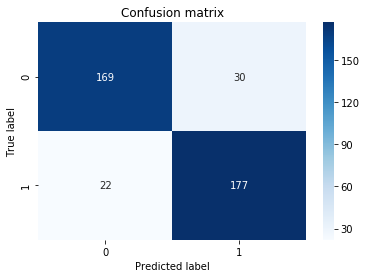

In [67]:
# Lets see the confusion matrix to undestand the miss classifications
from sklearn.metrics import confusion_matrix

y_pred = logistic_reg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Plot the  P[Ein-Eout|>e] , Hoeffding bound and the VC bound and check whether or not either bound is exceeded

In [68]:
# Plot Probabilities and Hoeffding Bound by Reusing Excercise from Week 1

def run_experiment(X, y, hypothesis, iterations):
    # Function to plot the Hoeffding bound

    N = [1, 10, 100, 500, 1000]
    
    # For loop to run the experiment with N samples
    for n in N:
        Eins = np.empty(iterations)
        Eouts = np.empty(iterations)
        dist = []
        test_size = n/X.shape[0]
        
        # For loop to find Ein and Eout for each train and test set
        for i in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=test_size)
            
            # Substract hypothesis scores from 1 on train and test data to get Ein/Eout
            Ein = 1 - hypothesis.score(X_train, y_train)
            Eout = 1 -  hypothesis.score(X_test, y_test)
            dist.append(abs(Ein - Eout))
            Eins[i] = Ein
            Eouts[i] = Eout
        
        # Find the average Ein and Eout
        Ein_mean = Eins.mean()
        Eout_mean = Eouts.mean()

        
        # Plot probabilities for various N    
        prob_epsilon=[]
        epsilons = np.arange(0, 1, 0.01)
        for e in epsilons:
            prob_epsilon.append(len([1 for i in dist if i > e])/len(dist))
        
        # Plot Prob of epsilon
        plt.plot(epsilons, prob_epsilon, 'b-', label="P[abs(Ein-Eout)>e]")
        
        # Plot Hoeffding bound for various N 
        hoeffding = [2*math.exp(-2*n*e**2) for e in epsilons]
        plt.plot(epsilons, hoeffding, 'r-', label="Hoeffding bound")
        
        # Plot VC bound for various N      
        #vc = [4*((2*n)**3+1)*math.exp(-(n/8)*e**2) for e in epsilons]
        #plt.plot(epsilons, vc, 'g-', label="VC bound")

        #print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoeffding))>0 else 
        #      "Error does not exceed Hoeffding")
        #print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")

        plt.title('N= {} Iterations={} Ein={:.2f} Eout={:.2f}'.format(n, iterations, Ein_mean, Eout_mean))
        
        plt.legend(loc='best')
        plt.xlabel('Epsilon')
        #plt.yscale('log')
        plt.show()

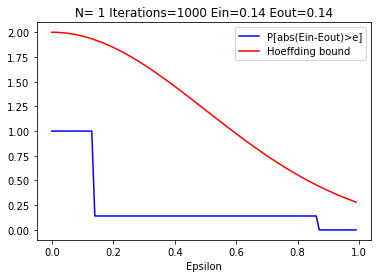

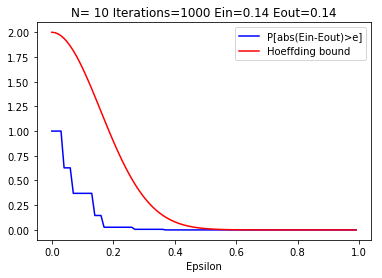

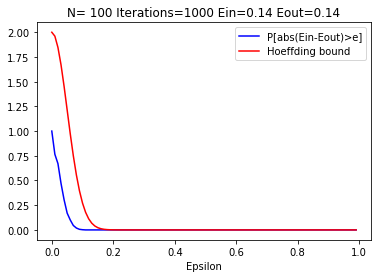

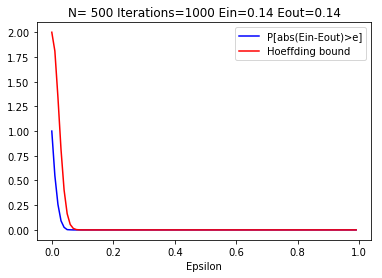

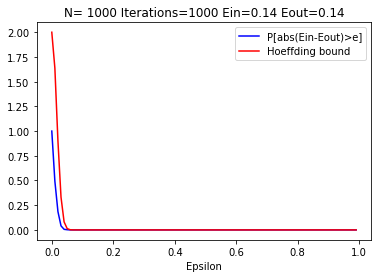

In [69]:
## Pass the weights for the chosen hypothesis and the dataset to a function
# that will generate random datasets and plot the performance versus the Hoeffding bound

run_experiment(X, y, logistic_reg, iterations=1000)

As N increases the plot are getting better

## Task 5 (CE6002)
Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

### Learning Curves
A learning curve shows how error changes as the training set size increases

As we increase the training set size, the model cannot fit perfectly anymore the training set. So the training error becomes larger. However, the model is trained on more data, so it manages to fit better the validation set. Thus, the validation error decreases

Learning curves give us an opportunity to diagnose bias and variance in supervised learning models.

Reference: 
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
2. https://www.dataquest.io/blog/learning-curves-machine-learning/

In [70]:
import re

def plot_learning_curve(estimator):
    cv=5
    n_jobs=2
    
    # Create train sizes
    # Note: The minimum train samples should also have samples of at least 2 classes in the data 
    train_sizes=np.linspace(0.1, 1.0, 5)
    print("Train sizes selected :\n", train_sizes)


    # Determine the cross-validated training and test scores for different training set sizes.
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, 
                                                            X=X_train, 
                                                            y=y_train, 
                                                            cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    
    print("train_scores:\n", train_scores)
    print("test_scores :\n", test_scores)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)

    # Extract the string value of estimator using regular expression
    estimator_string = re.sub(r" ?\([^)]+\)", "", str(estimator))
    plt.title("Learning curves of {} estimator.". format(estimator_string), fontsize = 12)
  
    plt.plot(train_sizes, train_scores_mean, 'ro--', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'go--', label= "CV score")
    
    # Highlight the standtard deviation from mean
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.legend(loc="best")
    plt.ylabel('Score')
    plt.xlabel('Training examples')
    
    plt.grid()
    plt.ylim(0.5, 1.01)
    plt.show()

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.91338583 0.91338583 0.91338583 0.91338583 0.91338583]
 [0.8716707  0.8716707  0.88135593 0.88135593 0.88135593]
 [0.87124464 0.87124464 0.86981402 0.86695279 0.86695279]
 [0.87208122 0.87817259 0.87614213 0.87411168 0.87106599]
 [0.87106918 0.875      0.87657233 0.87106918 0.87264151]]
test_scores :
 [[0.86206897 0.8369906  0.830721   0.81072555 0.86119874]
 [0.86520376 0.84639498 0.84639498 0.84542587 0.88643533]
 [0.87460815 0.85266458 0.87147335 0.86435331 0.88012618]
 [0.87774295 0.85266458 0.86833856 0.87066246 0.88328076]
 [0.87460815 0.85266458 0.86520376 0.87697161 0.88012618]]


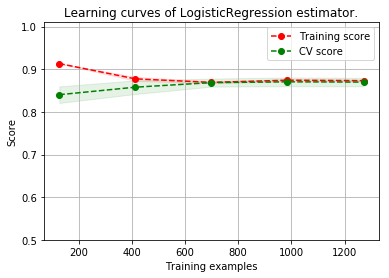

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.86614173 0.88188976 0.88188976 0.88188976 0.88188976]
 [0.78208232 0.87651332 0.89346247 0.89346247 0.89346247]
 [0.77825465 0.85979971 0.87410587 0.8683834  0.8683834 ]
 [0.79796954 0.87005076 0.88324873 0.86497462 0.85888325]
 [0.80503145 0.86163522 0.86792453 0.85927673 0.86163522]]
test_scores :
 [[0.85266458 0.87147335 0.84012539 0.829653   0.87697161]
 [0.81504702 0.86833856 0.8338558  0.86435331 0.86435331]
 [0.82131661 0.86833856 0.8338558  0.88012618 0.86750789]
 [0.81504702 0.86206897 0.8369906  0.88958991 0.85804416]
 [0.80564263 0.86520376 0.830721   0.89274448 0.85804416]]


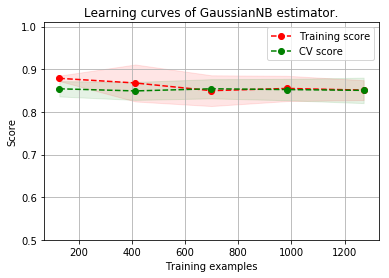

Train sizes selected :
 [0.1   0.325 0.55  0.775 1.   ]
train_scores:
 [[0.7007874  0.71653543 0.81102362 0.82677165 0.76377953]
 [0.81113801 0.81113801 0.75544794 0.82082324 0.84261501]
 [0.63948498 0.5379113  0.8111588  0.80686695 0.60801144]
 [0.6680203  0.83147208 0.8071066  0.8284264  0.77969543]
 [0.80188679 0.82468553 0.82783019 0.80738994 0.81761006]]
test_scores :
 [[0.5830721  0.5830721  0.77429467 0.73817035 0.77602524]
 [0.82758621 0.80877743 0.73981191 0.84227129 0.8170347 ]
 [0.61755486 0.50470219 0.78056426 0.71608833 0.57728707]
 [0.68338558 0.81818182 0.78369906 0.87381703 0.82018927]
 [0.82445141 0.78683386 0.78996865 0.74132492 0.83596215]]


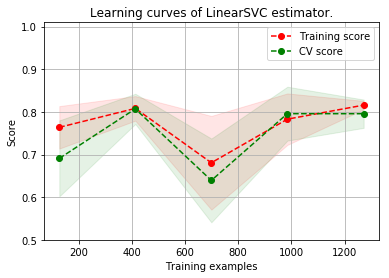

In [71]:
# Create the estimators
estimators = [LogisticRegression(), GaussianNB(), LinearSVC()]

# Run the test for learning curve
for e in estimators:
    plot_learning_curve(e)